In [1]:
import pandas as pd
import numpy as np

In [2]:
bikes = pd.read_pickle('https://github.com/rogovich/Data/blob/master/data/BikesDataVars.pkl?raw=true')

In [5]:
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [12]:
print(bikes['Seasons'].value_counts()) # частоты
print(bikes['Good weather'].value_counts())

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
0    7948
1     812
Name: Good weather, dtype: int64


<AxesSubplot:>

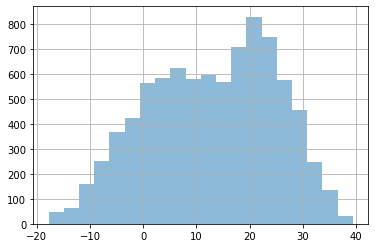

In [4]:
bikes['Temperature'].hist(bins = 20, alpha = 0.5) # гистограмма

In [21]:
bikes.groupby('Date')['Rental Count'].sum()

Date
2017-12-01     9802
2017-12-02     8404
2017-12-03     8644
2017-12-04     9556
2017-12-05     6578
              ...  
2018-11-26    13934
2018-11-27    13964
2018-11-28    17378
2018-11-29    18058
2018-11-30    17543
Name: Rental Count, Length: 365, dtype: int64

In [22]:
bikes.groupby(['Seasons', 'Date'])['Rental Count'].sum()

Seasons  Date      
Autumn   2018-09-01    25495
         2018-09-02    33943
         2018-09-03    10753
         2018-09-04    31363
         2018-09-05    34816
                       ...  
Winter   2018-02-24     6286
         2018-02-25     5780
         2018-02-26     9133
         2018-02-27     8923
         2018-02-28     3663
Name: Rental Count, Length: 365, dtype: int64

## Виды переменных

### Количественные (непрерывные - вес, погода, а также дискретные - количество детей в семье)

### Категориальные (номинальные - в какой группе вы учитесь, эти вещи нельзя сравнить, они просто как лейблы, порядковые - есть иерархия между перменными, которые мы, на самом деле, не можем чисто количественно оценить)

<AxesSubplot:xlabel='Seasons'>

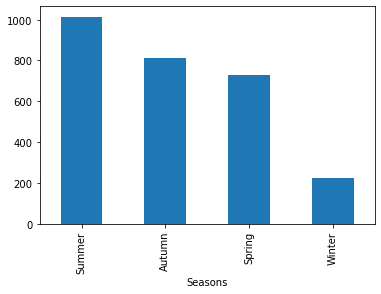

In [5]:
# chain syntax - цепочный синтаксис
bikes.groupby('Seasons')['Rental Count'].mean().sort_values(ascending=False).plot(kind = 'bar')

In [48]:
print(bikes.groupby('Temperature Category').size()) # long table
print(bikes['Temperature Category'].sort_values().value_counts())

Temperature Category
Chilly      3112
Freezing    1412
Hot         1279
Nice        2778
dtype: int64
Chilly      3112
Nice        2778
Freezing    1412
Hot         1279
Name: Temperature Category, dtype: int64


In [49]:
bikes.groupby('Seasons')['Temperature Category'].value_counts()

Seasons  Temperature Category
Autumn   Chilly                  1138
         Nice                     894
         Hot                       86
         Freezing                  20
Spring   Chilly                  1224
         Nice                     881
         Hot                       27
         Freezing                  22
Summer   Hot                     1166
         Nice                    1003
Winter   Freezing                1370
         Chilly                   750
Name: Temperature Category, dtype: int64

<AxesSubplot:xlabel='Seasons,Temperature Category'>

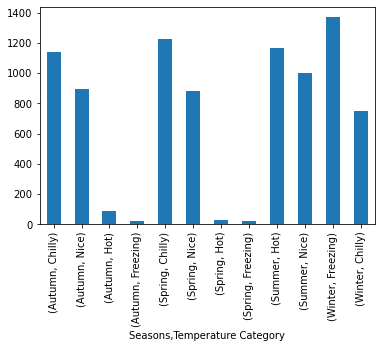

In [45]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().plot(kind = 'bar')

In [55]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack() # pivot table 
# это в первую очередь для таблиц с МУЛЬТИИНДЕКСАМИ

Temperature Category,Chilly,Freezing,Hot,Nice
Seasons,,,,
Autumn,1138.0,20.0,86.0,894.0
Spring,1224.0,22.0,27.0,881.0
Summer,NaN,NaN,1166.0,1003.0
Winter,750.0,1370.0,NaN,NaN


<AxesSubplot:xlabel='Seasons'>

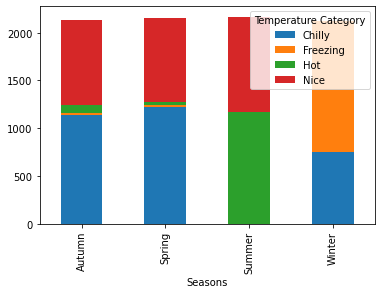

In [51]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack().plot(kind = 'bar', stacked = True)

* mean - среднее арифметическое
* std - среднеквадратичное отклонение

In [63]:
bikes[['Temperature']].describe()

,Temperature
count,8581.000000
mean,12.878557
std,11.955551
min,-17.800000
25%,3.400000
50%,13.700000
75%,22.500000
max,39.400000


In [64]:
bikes['Temperature'].describe()

count    8581.000000
mean       12.878557
std        11.955551
min       -17.800000
25%         3.400000
50%        13.700000
75%        22.500000
max        39.400000
Name: Temperature, dtype: float64

In [69]:
bikes['Temperature'].quantile(0.75) - bikes['Temperature'].quantile(0.25) # IQR

19.1

In [71]:
bikes['Temperature Category'].mode()

0    Chilly
Name: Temperature Category, dtype: category
Categories (4, object): ['Chilly', 'Freezing', 'Hot', 'Nice']

In [78]:
def var_range(x):
    return x.max() - x.min()

In [86]:
bikes.groupby('Hour')[['Rental Count', 'Temperature']].agg(func = ['mean', 'median', var_range, 'sum']) # агрегирование

Rental Count                          Temperature                   \
             mean median var_range     sum        mean median var_range   
Hour                                                                      
0      558.178082    433      2059  203735   11.253652  11.80      48.0   
1      415.720548    329      1485  151738   10.972145  11.50      47.8   
2      319.767123    239      1950  116715   10.542535  10.90      47.5   
3      201.010959    165       781   73369   10.355462  10.70      47.2   
4      122.838356     94       608   44836   10.069859  10.40      47.5   
5      135.863014    107       561   49590    9.849580  10.00      47.6   
6      283.654795    193      1577  103534    9.763944  10.00      47.9   
7      612.646575    410      2880  223616    9.454062   9.60      48.0   
8      979.838356    762      4438  357641    9.988515  10.40      49.6   
9      642.136986    519      2318  234380   11.459669  12.10      50.5   
10     519.123288    414      1740  189480   12.766947  14.00      50.9   
11     585.336986    485      2041  213648   14.285434  16.40      51.4   
12     710.534247    572      2239  259345   15.417175  17.40      51.2   
13     700.706849    586      2805  255758   16.184765  18.30      51.2   
14     747.147945    567      3163  272709   16.862360  19.10      50.8   
15     796.084932    678      3194  290571   17.084358  19.20      50.7   
16     938.032877    804      3671  342382   16.821652  18.80      50.6   
17    1128.873973    899      4450  412039   16.325281  18.40      50.8   
18    1518.983562   1154      6012  554429   15.255956  16.80      50.8   
19    1168.328767    845      5418  426440   14.254062  15.20      49.9   
20    1069.698630    721      3857  390440   13.394460  14.10      48.8   
21     997.942466    688      4373  364249   12.680165  13.40      48.0   
22     893.621918    649      3432  326172   12.281461  12.95      48.1   
23     671.898630    516      2603  245243   11.717416  12.25      48.1   

              
         sum  
Hour          
0     4006.3  
1     3939.0  
2     3742.6  
3     3696.9  
4     3574.8  
5     3516.3  
6     3466.2  
7     3375.1  
8     3565.9  
9     4148.4  
10    4557.8  
11    5099.9  
12    5565.6  
13    5842.7  
14    6003.0  
15    6116.2  
16    5904.4  
17    5811.8  
18    5507.4  
19    5088.7  
20    4835.4  
21    4602.9  
22    4372.2  
23    4171.4

In [87]:
bikes.pivot_table(index = 'Hour',
                 values = ['Rental Count', 'Temperature'],
                 aggfunc = ['mean', 'median', var_range, 'std']) # агрегирование

mean                   median                var_range  \
     Rental Count Temperature Rental Count Temperature Rental Count   
Hour                                                                  
0      558.178082   11.253652          433       11.80         2059   
1      415.720548   10.972145          329       11.50         1485   
2      319.767123   10.542535          239       10.90         1950   
3      201.010959   10.355462          165       10.70          781   
4      122.838356   10.069859           94       10.40          608   
5      135.863014    9.849580          107       10.00          561   
6      283.654795    9.763944          193       10.00         1577   
7      612.646575    9.454062          410        9.60         2880   
8      979.838356    9.988515          762       10.40         4438   
9      642.136986   11.459669          519       12.10         2318   
10     519.123288   12.766947          414       14.00         1740   
11     585.336986   14.285434          485       16.40         2041   
12     710.534247   15.417175          572       17.40         2239   
13     700.706849   16.184765          586       18.30         2805   
14     747.147945   16.862360          567       19.10         3163   
15     796.084932   17.084358          678       19.20         3194   
16     938.032877   16.821652          804       18.80         3671   
17    1128.873973   16.325281          899       18.40         4450   
18    1518.983562   15.255956         1154       16.80         6012   
19    1168.328767   14.254062          845       15.20         5418   
20    1069.698630   13.394460          721       14.10         3857   
21     997.942466   12.680165          688       13.40         4373   
22     893.621918   12.281461          649       12.95         3432   
23     671.898630   11.717416          516       12.25         2603   

                          std              
     Temperature Rental Count Temperature  
Hour                                       
0           48.0   455.016192   11.437803  
1           47.8   338.058896   11.391632  
2           47.5   268.797389   11.411300  
3           47.2   162.601701   11.306762  
4           47.5   106.375778   11.284178  
5           47.6   113.191916   11.310231  
6           47.9   273.636723   11.323973  
7           48.0   582.515881   11.487845  
8           49.6   871.005983   11.931827  
9           50.5   500.018849   12.199029  
10          50.9   415.278139   12.148809  
11          51.4   452.773454   12.038602  
12          51.2   538.838247   11.929531  
13          51.2   539.252891   11.833386  
14          50.8   613.267340   11.825084  
15          50.7   631.989742   11.872539  
16          50.6   744.642450   11.798065  
17          50.8   935.173622   12.080028  
18          50.8  1286.770715   12.154047  
19          49.9  1088.371072   11.847401  
20          48.8   995.999725   11.656540  
21          48.0   916.900635   11.480006  
22          48.1   787.161188   11.480268  
23          48.1   581.424225   11.345552

In [93]:
# нахождение выбросов
ts = bikes['Rental Count'].mean() + bikes['Rental Count'].std() * 3
print(bikes['Rental Count'].mean() - bikes['Rental Count'].std() * 3) # - отрицательное число - выбросов нет

-1552.8557617222968


In [89]:
bikes[bikes['Rental Count'] >= ts]['Hour'].value_counts()

18    55
19    34
20    22
17    18
8     13
21    13
22     8
14     2
15     2
16     2
Name: Hour, dtype: int64

In [94]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   int64         
 9   Functioning Day       8760 non-null   bool          
 10  Rental Count          8760 non-null   int64         
 11  Normal Humidity       8760 non-null   int64         
 12  Temperature Category  8581 non-null   category      
 13  Good weather      

In [95]:
bikes.groupby('Seasons')['Temperature'].mean()

Seasons
Autumn    14.138821
Spring    13.038533
Summer    26.574827
Winter    -2.567783
Name: Temperature, dtype: float64

In [97]:
bikes.dropna(subset = ['Temperature'], axis = 0)

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34,2.6,0.0,0.0,Autumn,0,True,644,0,Chilly,0
8756,2018-11-30,20,3.4,37,2.3,0.0,0.0,Autumn,0,True,359,0,Chilly,0
8757,2018-11-30,21,2.6,39,0.3,0.0,0.0,Autumn,0,True,1236,0,Chilly,0
8758,2018-11-30,22,2.1,41,1.0,0.0,0.0,Autumn,0,True,628,1,Chilly,0


In [99]:
bikes.isna().any()

Date                    False
Hour                    False
Temperature              True
Humidity                False
Wind speed              False
Rainfall                False
Snowfall                False
Seasons                 False
Holiday                 False
Functioning Day         False
Rental Count            False
Normal Humidity         False
Temperature Category     True
Good weather            False
dtype: bool

In [103]:
bikes['Temp_temp'] = bikes['Temperature'].fillna(bikes['Temperature'].mean())

In [104]:
bikes[bikes['Temperature'].isna()]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good weather,Temp_temp
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,0,True,688,1,NaN,0,12.878557
50,2017-12-03,2,NaN,79,1.4,0.0,0.0,Winter,0,True,262,0,NaN,0,12.878557
64,2017-12-03,16,NaN,77,1.6,0.0,0.0,Winter,0,True,577,0,NaN,0,12.878557
105,2017-12-05,9,NaN,31,1.3,0.0,0.0,Winter,0,True,313,0,NaN,0,12.878557
151,2017-12-07,7,NaN,93,0.5,0.0,0.9,Winter,0,True,269,0,NaN,0,12.878557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8669,2018-11-27,5,NaN,84,0.6,0.0,0.0,Autumn,0,True,176,0,NaN,0,12.878557
8679,2018-11-27,15,NaN,70,2.1,0.0,0.0,Autumn,0,True,670,0,NaN,0,12.878557
8710,2018-11-28,22,NaN,34,1.3,0.0,0.0,Autumn,0,True,1034,0,NaN,0,12.878557
8717,2018-11-29,5,NaN,34,0.9,0.0,0.0,Autumn,0,True,30,0,NaN,0,12.878557


In [2]:
bikes.isna().sum()

Date                      0
Hour                      0
Temperature             179
Humidity                  0
Wind speed                0
Rainfall                  0
Snowfall                  0
Seasons                   0
Holiday                   0
Functioning Day           0
Rental Count              0
Normal Humidity           0
Temperature Category    179
Good weather              0
dtype: int64

In [5]:
np.nan # если в кодбуке обозначение пропусков заполнено как-то иначе, то можно применить этот метод к таким значениям при fillna

nan

In [6]:
bikes.dropna(subset=['Temperature'])

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34,2.6,0.0,0.0,Autumn,0,True,644,0,Chilly,0
8756,2018-11-30,20,3.4,37,2.3,0.0,0.0,Autumn,0,True,359,0,Chilly,0
8757,2018-11-30,21,2.6,39,0.3,0.0,0.0,Autumn,0,True,1236,0,Chilly,0
8758,2018-11-30,22,2.1,41,1.0,0.0,0.0,Autumn,0,True,628,1,Chilly,0


In [10]:
bikes['Temp'] = bikes['Temperature'].fillna(42)
bikes[bikes['Temperature'].isna()][['Temperature', 'Temp']]


,Temperature,Temp
39,NaN,42.0
50,NaN,42.0
64,NaN,42.0
105,NaN,42.0
151,NaN,42.0
...,...,...
8669,NaN,42.0
8679,NaN,42.0
8710,NaN,42.0
8717,NaN,42.0


In [11]:
bikes['Temp'] = bikes['Temperature'].fillna(bikes['Temperature'].mean())
bikes.iloc[37:66][['Temperature', 'Temp']]

,Temperature,Temp
37,6.0,6.000000
38,7.3,7.300000
39,NaN,12.878557
40,6.4,6.400000
41,6.0,6.000000
42,5.5,5.500000
43,5.0,5.000000
44,4.6,4.600000
45,4.1,4.100000
46,3.5,3.500000


In [13]:
np.random.choice(bikes['Temperature'].dropna())
bikes.iloc[37:66][['Temperature', 'Temp']]

,Temperature,Temp
37,6.0,6.000000
38,7.3,7.300000
39,NaN,12.878557
40,6.4,6.400000
41,6.0,6.000000
42,5.5,5.500000
43,5.0,5.000000
44,4.6,4.600000
45,4.1,4.100000
46,3.5,3.500000


In [59]:
bikes.groupby('Seasons')['Temperature'].mean()

Seasons
Autumn    14.138821
Spring    13.038533
Summer    26.574827
Winter    -2.567783
Name: Temperature, dtype: float64

In [3]:
bikes.groupby('Seasons')['Temperature'].transform('mean') # среднее по сезону для каждого наблюдения

0       -2.567783
1       -2.567783
2       -2.567783
3       -2.567783
4       -2.567783
          ...    
8755    14.138821
8756    14.138821
8757    14.138821
8758    14.138821
8759    14.138821
Name: Temperature, Length: 8760, dtype: float64

In [6]:
bikes['Temp'] = bikes['Temperature'].fillna(bikes.groupby('Seasons')['Temperature'].transform('mean'))
bikes.iloc[37:106][['Temperature', 'Temp']]

,Temperature,Temp
37,6.0,6.000000
38,7.3,7.300000
39,NaN,-2.567783
40,6.4,6.400000
41,6.0,6.000000
...,...,...
101,-7.4,-7.400000
102,-7.4,-7.400000
103,-7.5,-7.500000
104,-8.1,-8.100000


In [7]:
random_values = pd.Series(np.random.choice(bikes['Temperature'].dropna(), 8760))
random_values

0       24.3
1       13.5
2        2.4
3        5.1
4        7.7
        ... 
8755     8.0
8756    -0.3
8757    19.0
8758    -4.4
8759    10.8
Length: 8760, dtype: float64

In [11]:
bikes['Temp'] = bikes['Temperature'].fillna(random_values)
bikes.iloc[37:106][['Temperature', 'Temp']]

,Temperature,Temp
37,6.0,6.0
38,7.3,7.3
39,NaN,9.5
40,6.4,6.4
41,6.0,6.0
...,...,...
101,-7.4,-7.4
102,-7.4,-7.4
103,-7.5,-7.5
104,-8.1,-8.1


In [13]:
bikes.groupby('Date')['Temperature'].transform('mean')

0      -2.454167
1      -2.454167
2      -2.454167
3      -2.454167
4      -2.454167
          ...   
8755    2.917391
8756    2.917391
8757    2.917391
8758    2.917391
8759    2.917391
Name: Temperature, Length: 8760, dtype: float64

In [15]:
bikes['Temp'] = bikes['Temperature'].fillna(bikes.groupby('Date')['Temperature'].transform('mean'))
bikes.iloc[37:78][['Temperature', 'Temp']]

,Temperature,Temp
37,6.0,6.000000
38,7.3,7.300000
39,NaN,1.052174
40,6.4,6.400000
41,6.0,6.000000
42,5.5,5.500000
43,5.0,5.000000
44,4.6,4.600000
45,4.1,4.100000
46,3.5,3.500000


In [16]:
bikes['Temp'] = bikes['Temperature'].fillna(method='ffill') # хороший метод для временных рядов, также можно использовать bfill
bikes.iloc[37:78][['Temperature', 'Temp']]

,Temperature,Temp
37,6.0,6.0
38,7.3,7.3
39,NaN,7.3
40,6.4,6.4
41,6.0,6.0
42,5.5,5.5
43,5.0,5.0
44,4.6,4.6
45,4.1,4.1
46,3.5,3.5


In [17]:
bikes['Temp'] = bikes['Temperature'].interpolate() # заполняет по ближайшим значениям
bikes.iloc[37:78][['Temperature', 'Temp']]

,Temperature,Temp
37,6.0,6.00
38,7.3,7.30
39,NaN,6.85
40,6.4,6.40
41,6.0,6.00
42,5.5,5.50
43,5.0,5.00
44,4.6,4.60
45,4.1,4.10
46,3.5,3.50


In [9]:
temp_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Temperature'].mean()
bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()
humidity_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Humidity'].mean()
wind_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Wind speed'].mean()
bikes_week = pd.concat([temp_mean,bikes_sum, humidity_mean, wind_mean], axis=1) # axis = 1 делает то, что мы добавляем именно колонку, а не значения

In [47]:
bikes_week.corr()

,Temperature,Rental Count,Humidity,Wind speed
Temperature,1.000000,0.845695,0.585226,-0.420212
Rental Count,0.845695,1.000000,0.389963,-0.434142
Humidity,0.585226,0.389963,1.000000,-0.456225
Wind speed,-0.420212,-0.434142,-0.456225,1.000000


In [48]:
bikes_week.corr()['Rental Count'].sort_values()

Wind speed     -0.434142
Humidity        0.389963
Temperature     0.845695
Rental Count    1.000000
Name: Rental Count, dtype: float64

In [12]:
bikes_week.corr()[bikes_week.corr() < 1]['Rental Count'].dropna()

Temperature    0.845695
Humidity       0.389963
Wind speed    -0.434142
Name: Rental Count, dtype: float64

In [49]:
bikes_week.corr()['Rental Count'].apply(np.abs).sort_values() # np.abs - убираем отрицательные связи

Humidity        0.389963
Wind speed      0.434142
Temperature     0.845695
Rental Count    1.000000
Name: Rental Count, dtype: float64

In [55]:
corr = bikes_week.corr()
corr.abs().unstack().sort_values().drop_duplicates()

Rental Count  Humidity        0.389963
Temperature   Wind speed      0.420212
Rental Count  Wind speed      0.434142
Humidity      Wind speed      0.456225
Temperature   Humidity        0.585226
              Rental Count    0.845695
              Temperature     1.000000
dtype: float64

In [58]:
isnull()

NameError: name 'isnull' is not defined